## 0.0 Problem description
The problem of identifying diseases based on symptopms involves several challenges nowdays:
- Overlapping symptoms: Many diseases share similar symptoms, this make to reach an accurate dianosis
- Lack of medical services: Patients withput access to specialist may not receiba an early and accurate diagnosis
- Even experienced doctors can make mistakes
- Limited time and resources: In high-demand hospitals like Mexico, doctos may not have enough time to analyze all factors of a patient's condition

## 1.0 Exploratory Data Analysis procedure

### 1.1 Dataset
Dataset: Disease Symptom Prediction, Kaggle
https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset

### 1.2 Machine Learning Models
- RandomForestClassifier: This is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) of the individual trees.

- LogisticRegression: This is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. It is used for binary classification problems.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, HTML

data  = pd.read_csv("../data/dataset.csv")


With EDA, I start to explore and analysis the data. Starting using.shape to look at the dimeniosn of dataset, with proving the number of rows and columns below. 

In [13]:
#Display the colums of the data set
print("Number of Disease(Rows): " + str(data.shape[0]))
print("Number of Symptom(Columns): " + str(data.shape[1]))
print(data)

Number of Disease(Rows): 4920
Number of Symptom(Columns): 18
                                      Disease             Symptom_1  \
0                            Fungal infection               itching   
1                            Fungal infection             skin_rash   
2                            Fungal infection               itching   
3                            Fungal infection               itching   
4                            Fungal infection               itching   
...                                       ...                   ...   
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                  Symptom_2              Symptom_3                  Symptom_4  \
0    

### 1.3 Statistical Metrics
data.describe() displays the mean, std, minimum, and maximum values for the dataset which will assist in understand the range/distribution of the data while data.head() displays the first rows of a DataFrame, it hellp me with quicky inspeact the structure and contect of dataset

In [14]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [15]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.4 Data cleaning

             Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
Disease     1.000000  -0.261814  -0.084411  -0.042227  -0.086792  -0.055276   
Symptom_1  -0.261814   1.000000  -0.043362   0.118788   0.193146   0.078957   
Symptom_2  -0.084411  -0.043362   1.000000  -0.026983   0.086465  -0.060654   
Symptom_3  -0.042227   0.118788  -0.026983   1.000000  -0.264756   0.016827   
Symptom_4  -0.086792   0.193146   0.086465  -0.264756   1.000000  -0.087494   
Symptom_5  -0.055276   0.078957  -0.060654   0.016827  -0.087494   1.000000   
Symptom_6  -0.145203   0.022503  -0.186539  -0.173736  -0.024463   0.372599   
Symptom_7  -0.347849   0.098601  -0.221452   0.084273  -0.143803   0.524071   
Symptom_8  -0.309583   0.217522  -0.246351   0.068856  -0.009458   0.421903   
Symptom_9  -0.221644   0.203916  -0.110205   0.079941   0.032849   0.333107   
Symptom_10 -0.130663   0.051263   0.026727  -0.017539  -0.108092   0.397099   
Symptom_11 -0.130510   0.032281  -0.008550   0.03314

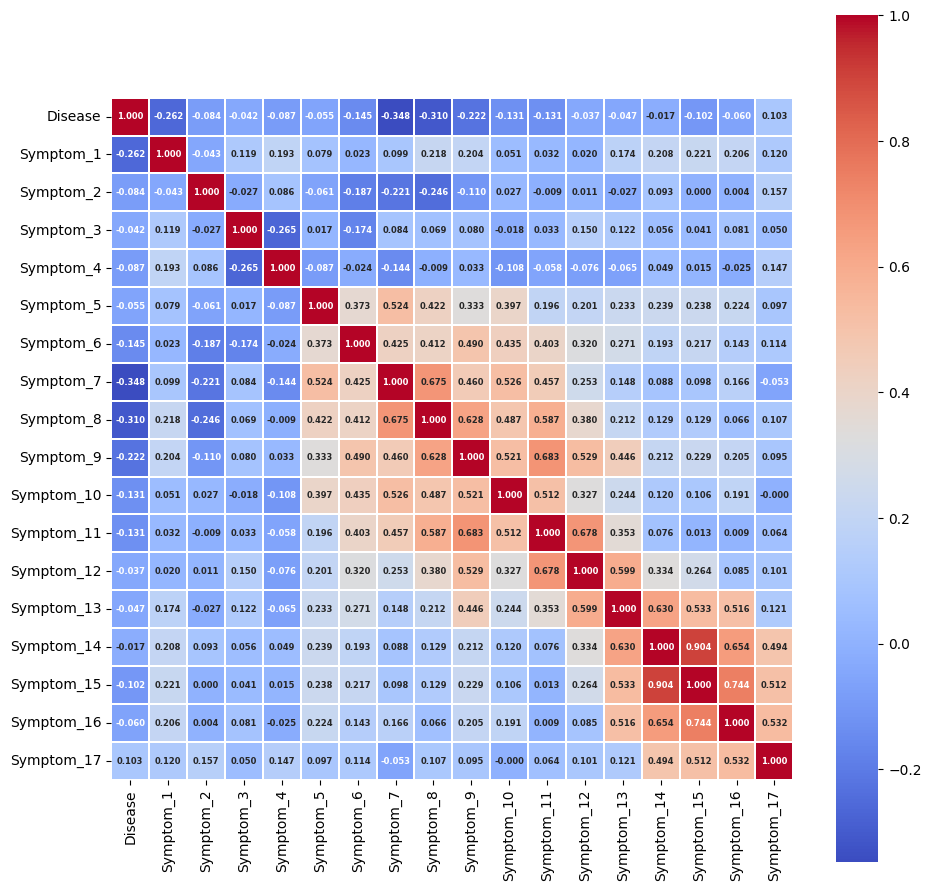

In [16]:
# Identify symptom columns (excluding disease label)
symptom_cols = [col for col in data.columns if "Symptom" in col]
label_col = "Disease"  # Adjust this based on your dataset

# Encode disease labels using Label Encoding
label_encoder = LabelEncoder()
data[label_col] = label_encoder.fit_transform(data[label_col])

# =====================
# **Identify and Encode Categorical Columns**
# =====================

# Identify categorical symptom columns (if any)
categorical_cols = data[symptom_cols].select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical symptoms if needed
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
onehot_encoder.fit(data[categorical_cols])

# =====================
# **Apply One-Hot Encoding and Finalize Dataset**
# =====================

# Convert categorical values to one-hot encoding
data_encoded = pd.DataFrame(onehot_encoder.transform(data[categorical_cols]), 
                          columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Combine original dataset (excluding categorical columns) with the one-hot encoded data
data_final = pd.concat([data.drop(columns=categorical_cols), data_encoded], axis=1)

# Separate features and labels
X = data_final.drop(columns=[label_col])
y = data_final[label_col]

# =====================
# **Correlation Matrix**
# =====================
data_encoded = data.apply(LabelEncoder().fit_transform)
correlation_matrix = data_encoded.corr()
print(correlation_matrix)

plt.figure(figsize=(11,11))
sns.heatmap(correlation_matrix, 
            cmap= 'coolwarm', 
            annot=True, 
            fmt=".3f",
            annot_kws={"size": 6, "weight": "bold"},
            square=True,
            linewidths=.05)
plt.savefig('../results/heat_mat.png', dpi=300)
plt.show()

## 2.0 Analysis

In [17]:
# =====================
# **Train Model**
# =====================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X, y)

# =====================
# **Define New Symptoms for Prediction**
# =====================
input_symptoms = {
    "Symptom_1": "0",
    "Symptom_2": "0",
    "Symptom_3": "1",
    "Symptom_4": "1",
    "Symptom_5": "0",
    "Symptom_6": "0",
    "Symptom_7": "0",
    "Symptom_8": "0",
    "Symptom_9": "0",
    "Symptom_10": "0",
    "Symptom_11": "0",
    "Symptom_12": "1",
    "Symptom_13": "0",
    "Symptom_14": "0",
    "Symptom_15": "0",
    "Symptom_16": "0",
    "Symptom_17": "1",
}

# Convert to DataFrame
input_data = pd.DataFrame([input_symptoms])

# Ensure input matches dataset columns, filling missing columns with "0"
input_data = input_data.reindex(columns=symptom_cols, fill_value="0")

# Encode categorical values if needed
if categorical_cols:
    input_encoded = pd.DataFrame(
        onehot_encoder.transform(input_data[categorical_cols]),
        columns=onehot_encoder.get_feature_names_out(categorical_cols),
        index=input_data.index
    )
    input_data = pd.concat([input_data.drop(columns=categorical_cols), input_encoded], axis=1)

# Ensure final input matches trained feature columns, filling missing columns with "0"
input_data = input_data.reindex(columns=X.columns, fill_value=0)

# =====================
# **Predict Disease (Random Forest)**
# =====================
rf_predicted_disease_index = rf_model.predict(input_data)[0]
rf_predicted_disease = label_encoder.inverse_transform([rf_predicted_disease_index])[0]

rf_probabilities = rf_model.predict_proba(input_data)
rf_disease_probabilities = dict(zip(label_encoder.classes_, rf_probabilities[0]))
rf_sorted_predictions = sorted(rf_disease_probabilities.items(), key=lambda x: x[1], reverse=True)

# =====================
# **Predict Disease (Logistic Regression)**
# =====================
lr_predicted_disease_index = lr_model.predict(input_data)[0]
lr_predicted_disease = label_encoder.inverse_transform([lr_predicted_disease_index])[0]

lr_probabilities = lr_model.predict_proba(input_data)
lr_disease_probabilities = dict(zip(label_encoder.classes_, lr_probabilities[0]))
lr_sorted_predictions = sorted(lr_disease_probabilities.items(), key=lambda x: x[1], reverse=True)


## 3.0 Results

### 3.1 Predict Disease(Random Forest and Logistic Regression) Results

In [18]:
print(f"\n[Logistic Regression] Predicted Disease: {lr_predicted_disease}")
for disease, probability in lr_sorted_predictions[:5]:
    print(f"{disease}: {probability:.2f}")

print(f"\n[Random Forest] Predicted Disease: {rf_predicted_disease}")
for disease, probability in rf_sorted_predictions[:5]:
    print(f"{disease}: {probability:.2f}")



[Logistic Regression] Predicted Disease: Common Cold
Common Cold: 0.06
Tuberculosis: 0.05
Dengue: 0.04
Hypothyroidism: 0.04
Hepatitis E: 0.04

[Random Forest] Predicted Disease: Common Cold
Common Cold: 0.40
Tuberculosis: 0.27
Dengue: 0.08
Hypothyroidism: 0.07
Hyperthyroidism: 0.04


Confusion matrix

In [19]:
cm = confusion_matrix(y, rf_model.predict(X))
print("\nConfusion matrix:")
display(HTML('<div style="height: 20px; overflow: auto;">' + str(cm) + '</div>'))


Confusion matrix:


Model Performance on Test Data

In [20]:
print("\nModel Performance on Test Data:")
print(classification_report(y, rf_model.predict(X), target_names=label_encoder.classes_))


Model Performance on Test Data:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       1.00      1.00      1.00       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       1.00      1.00      1.00       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       1.00      1.00      1.00       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       1.00      1.00      1.00       120
                    Chronic cholestasis       1.00      1.00      1.00       120
                            Common Cold       1.00      1.00      1.00     

## 4.0 Conclusion
 **Random Forest** algorithm demonstrated higher condidence in its predictions compared to Logistic regression, in this case we can see the difference for the Common Cold. This suggest that Random Forest is more effective for classification.

 ### 4.1 Confusion matrix Analysis
 The confusion matrix shos that there are no missclassifications, with all true in positives correctly, no false positives o false negatives. Each disease category has 120 correct redictions.

 ### 4.2 Performance
 The model achieved an overall accuracy of 100%, correctly classifying all instances in the test set
 - Precision: The proportion of true predictions among all positive predictions
 - Recall: The proportion of true positive predictions among all actual positives
 - F1-Score: The harmonic precision and recall, providing a single metric for both
 ### Benefits
 - Doctors: An AI-based system could help doctors, pre-diagnose diseases, reducing the margin of error
 - Patients: Those without immediate access could receive a preliminary guidance about their health
 - Hospitals: Tehy coudl optimize medical care and reduce unnecessary consultations, prioritizing urgent cases.

Overall, a symptom-based detection system could improve diagnostic efficiency, reduce costs and save lives.